# 2. DATA ANALYSIS
---


In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_data = pd.read_csv(r'C:\Users\rnogu\OneDrive\Documentos\GitHub\Alternative-time-series-project\data\raw\total_data_raw.csv')
total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


There is a daily record always at the same time, therefore, there is no need to clean the date.

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


The dataset has 366 rows and 2 columns.

Drop duplicates:

In [4]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


There are no duplicate entries.

3. Change the index to date

In [5]:
total_data = total_data.set_index("date")


4. Plotting

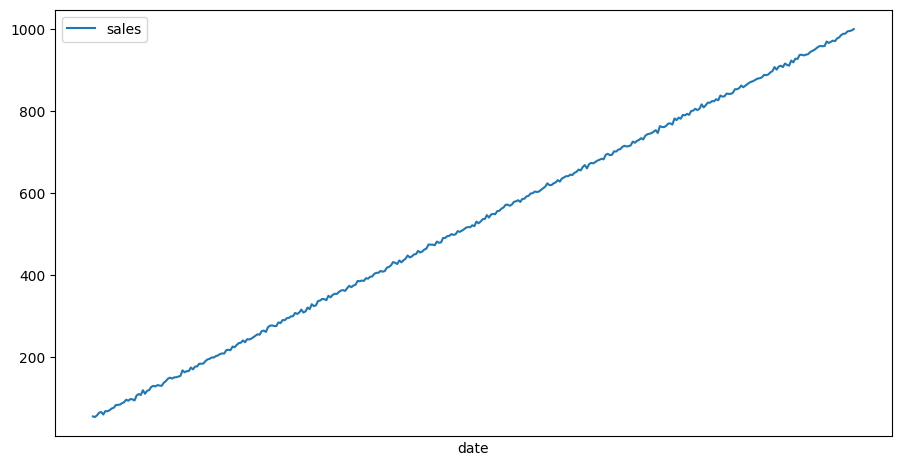

In [6]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = total_data)
plt.tight_layout()
plt.xticks([])
plt.show()

CONCLUSION (cambiar)

To analyze a time series, as we saw in the theory, we must study several parameters:

Trend: An upward trend is apparent, indicating that the number of passengers has increased over time. This may be due to several factors: growth of the airline industry and provision of more resources to move passengers, price reduction, increased interest in air travel, and so on.
Seasonality: There is some seasonality in the data, with certain months consistently having more flights than others. This could be due to seasonal demand (more people flying during the vacations, for example).
Variability: There are some points of variability in the time series, especially between periods of increasing and decreasing demand.
Outliers: Studying the trend and seasonality of the time series, no outliers are observed in the time series.
Inflection points: Depending on the year, the increase in the number of passengers is not regular and sometimes there are variations in the slope; these are inflection points.
Through visual analysis we might be able to estimate these metrics by eye, but it is always better to orient the analysis to mathematical data. For the task of making predictions on time series and analyzing them, we will rely on the statsmodels library.

5. Analysis

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(total_data, period = 12)
decomposition

5.1. Trend analysis

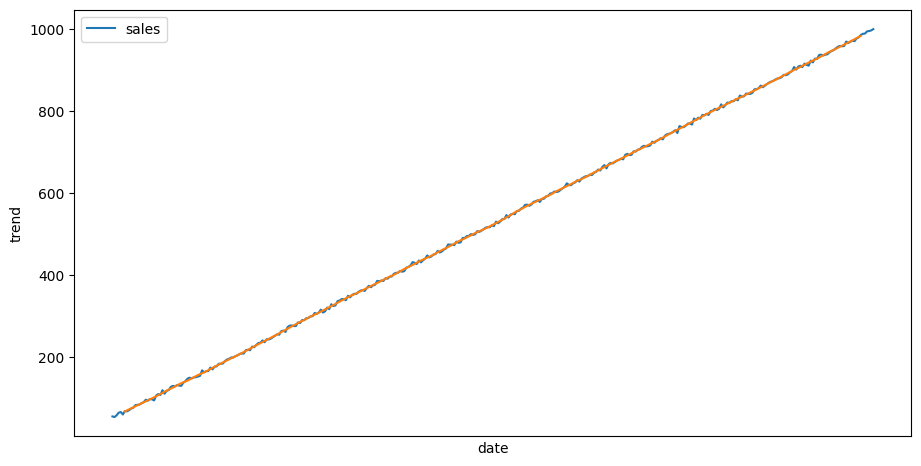

In [8]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = total_data)
sns.lineplot(data = trend)
plt.tight_layout()
plt.xticks([])
plt.show()

Conclusions

5.2. Seasonality analysis

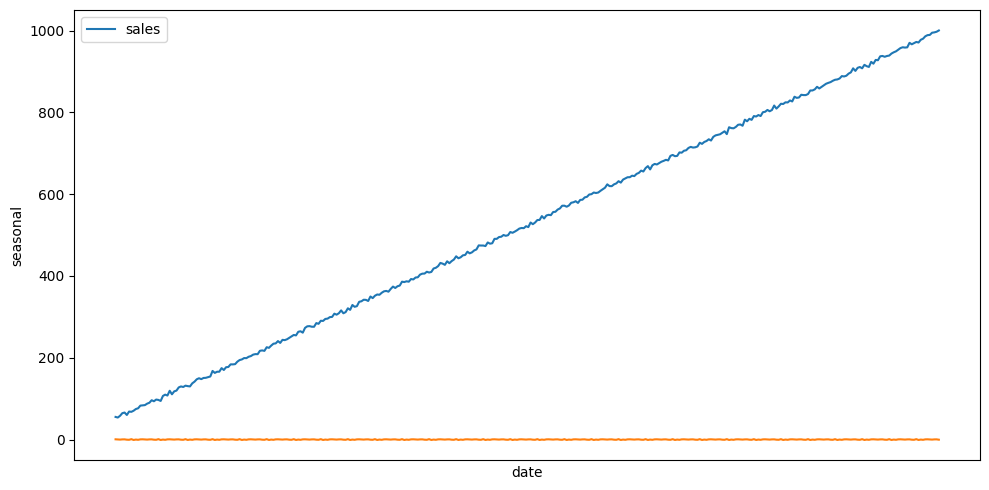

In [9]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = total_data)
sns.lineplot(data = seasonal)
plt.xticks([])
plt.tight_layout()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_data)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

A p-value less than a chosen significance level (commonly 0.05) indicates that you can reject the null hypothesis. In your case, the p-value is quite high (0.986190), which suggests that you accept the null hypothesis, the series is non-stationary.

5.3. Analysis of variability

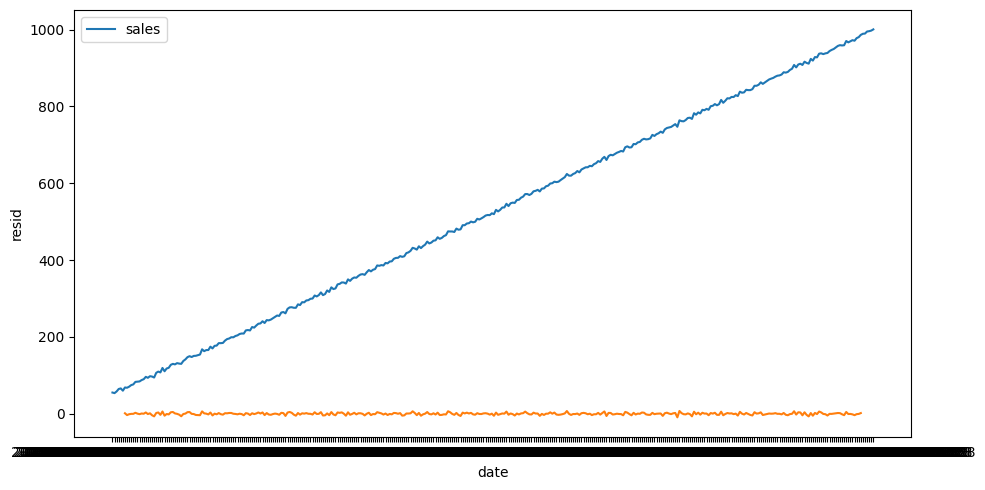

In [11]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

5.4. Autocorrelation analysis

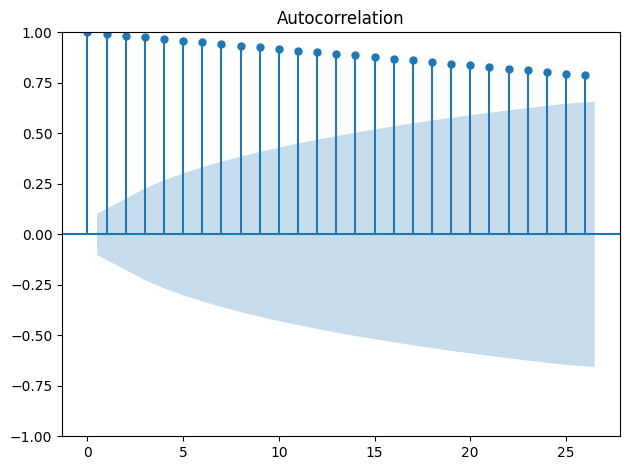

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(total_data)
plt.tight_layout()
plt.show()

____

# GENERAL CONCLUSIONS

***
# MACHINE LEARNING MODEL

In [13]:
td_stationary = total_data.diff().dropna()
test_stationarity(td_stationary)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [14]:
from pmdarima import auto_arima
model = auto_arima(td_stationary, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.122, Time=4.99 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=1.18 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.049, Time=0.60 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.43 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.48 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.436, Time=1.77 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.32 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.34 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [ ]:
model.summary()

In [ ]:
forecast = model.predict(10)
forecast